Malan Moody
Project 1

Load image as grayscale

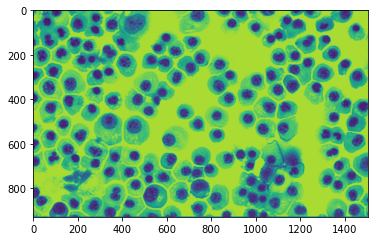

In [119]:
import cv2
import numpy as np
from skimage import morphology
from matplotlib import pyplot as plt
import math

img = cv2.imread("RBC-stained.png", 0)
plt.imshow(img)

Convert grayscale to inverted binary with Otsu binarization

130.0


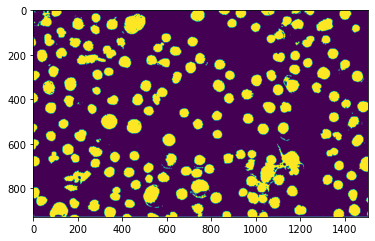

In [120]:
#ret,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print(ret)
plt.imshow(img)

We erode our image, then dilate it back up to remove any small objects

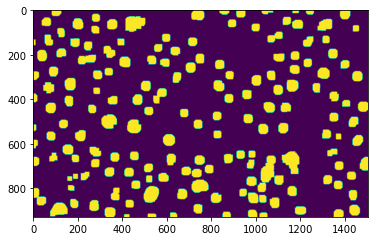

In [121]:
kernel = np.ones((5,5), np.uint8)
img = cv2.erode(img, kernel, iterations=5)
img = cv2.dilate(img, kernel, iterations=5)

plt.imshow(img)

We count the number of cells in the image

We count cells with radius greater than 50 as having area > 3.14 * 50^2 = 7850

We also count cells with minimum enclosing circle radius > 50

Cells: 166
Cells with minimum enclosing circle radius > 50: 3
Cells with area > pi*50^2: 0


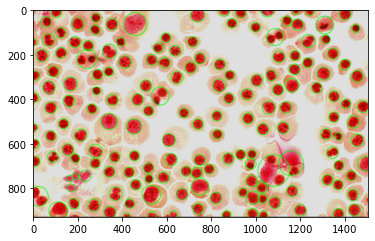

In [122]:
cnts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

original = cv2.imread("RBC-stained.png")
cells = 0
mecCells = 0
aCells = 0
for c in cnts:
    # Centroid
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    # Minimum Enclosing Circle
    (x,y),radius = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    radius = int(radius)
    
    # Area
    area = cv2.contourArea(c)
      
    cv2.circle(original,center,radius,(0,255,0),2)    
        
    cells += 1
    if radius > 50:
        mecCells += 1
    if area > 7850:
        aCells += 1
        
print('Cells: {}'.format(cells))
print('Cells with minimum enclosing circle radius > 50: {}'.format(mecCells))
print('Cells with area > pi*50^2: {}'.format(aCells))
plt.imshow(original)